In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import graphs
import weights
import pandas as pd

In [2]:
edges_8 = [
        (1, 2), (2,1), (1, 3),(3,1), (1, 4), (4,1), (2, 3), (3,2), (5,2), (4,3), (6,3), 
        (2, 5), (3, 4), (3, 6), (4, 7), (7,4), (6,5), (7,6), (8,6), (8,5), (8,7),
        (5, 6), (6, 7), (6, 8),
        (5, 8), (7, 8)]

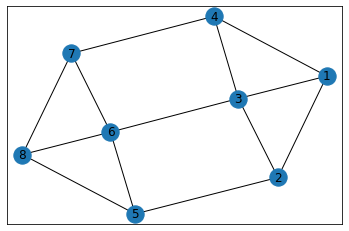

In [3]:
G = nx.Graph()
G.add_edges_from(edges_8)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [4]:
R = np.matrix(np.zeros(shape=(9,9)))
for x in G[8]:
    R[x, 8] = 100

In [5]:
Q = np.matrix(np.zeros(shape=(9,9)))
Q -= 100
for node in G.nodes:
    for x in G[node]:
        speed = random.randint(40, 90)
        Q[node,x] = speed
        Q[x, node] = speed


In [6]:
def next_number(start, er):
    random_value = random.uniform(0, 1)
    if random_value<er:
        sample = G[start]
    else:
        sample = np.where(Q[start,] == np.max(Q[start,]))[1]
    next_node = int(np.random.choice(sample, 1))
    return next_node

In [7]:
def updateQ(node1, node2, lr, discount):
    max_index = np.where(Q[node2,] == np.max(Q[node2,]))[1]
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[node2, max_index]
    Q[node1, node2] = int((1-lr)*Q[node1, node2] + lr * (R[node1, node2] + discount * max_value))

In [8]:
def learn(er,lr,discount, epoch):
    for i in range(epoch):
        start = np.random.randint(1,8)
        next_node = next_number(start, er)
        updateQ(start, next_node, lr, discount)


In [9]:
exploration_rate = 0.5
learning_rate = 0.8
discount_factor = 0.8
epoch = 50000

In [10]:
learn(exploration_rate, learning_rate, discount_factor, epoch)

In [11]:
pd.DataFrame(Q)

,0,1,2,3,4,5,6,7,8
0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
1,-100.0,-100.0,107.0,107.0,107.0,-100.0,-100.0,-100.0,-100.0
2,-100.0,85.0,-100.0,107.0,-100.0,135.0,-100.0,-100.0,-100.0
3,-100.0,85.0,107.0,-100.0,107.0,-100.0,135.0,-100.0,-100.0
4,-100.0,85.0,-100.0,107.0,-100.0,-100.0,-100.0,135.0,-100.0
5,-100.0,-100.0,107.0,-100.0,-100.0,-100.0,135.0,-100.0,170.0
6,-100.0,-100.0,-100.0,107.0,-100.0,135.0,-100.0,135.0,170.0
7,-100.0,-100.0,-100.0,-100.0,107.0,-100.0,135.0,-100.0,170.0
8,-100.0,-100.0,-100.0,-100.0,-100.0,70.0,88.0,78.0,-100.0


In [12]:
def shortest_path(begin,end):
    path=[begin]
    next_node=np.argmax(Q[begin,])
    path.append(next_node)
    while next_node != end:
        next_node = np.argmax(Q[next_node,])
        path.append(next_node)
    return path

In [13]:
from time import process_time

In [14]:
n = 50000

In [15]:
elapsed_time = 0
for i in range(n):
    start_qlearning = process_time()
    path = shortest_path(1, 8)
    end_qlearning = process_time()
    elapsed_time += end_qlearning - start_qlearning
qlearning_time = elapsed_time / n
print("Q-Learning time is", qlearning_time)
print("Path is", path)

Q-Learning time is 3.1811360000001446e-05
Path is [1, 2, 5, 8]
